In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
N = 100          # Number of neurons
kappa = 1
f_max = 20       # Maximum firing rate (spikes/s)
f0 = 5           # Baseline firing rate (spikes/s)
B = 0.5          # Decision bound
phi_1 = 0        # Orientation phi_1 in radians (Horizontal)
phi_2 = np.pi/2  # Orientation phi_2 in radians (Vertical)
c = 0.1          # Stimulus contrast
time_bin = 0.01  # Time bin size in seconds (10 ms)
T_max = 1.0      # Maximum time in seconds
n_trials = 1000  # Number of trials for simulations

# Preferred orientations of neurons, uniformly distributed between 0 and pi
phi_prefs = np.linspace(0, np.pi, N)

def degrees_to_radians(degrees):
    return degrees * np.pi / 180

def get_population_response(c, phi, phi_prefs, kappa, f_max, f0):
    """
    Returns the simulated population response (spike counts) and mean firing rates
    for given contrast c and stimulus orientation phi.
    """
    # Compute mean firing rates for each neuron
    f = f0 + c * f_max * np.exp(kappa * (np.cos(2 * (phi - phi_prefs)) - 1))
    # Simulate spike counts using Poisson distribution
    r = np.random.poisson(f * time_bin)
    return r, f

def compute_weight_vector(f_phi1, f_phi2):
    """
    Computes the optimal weight vector w_opt based on the mean responses to phi_1 and phi_2.
    """
    f_phi_avg = (f_phi1 + f_phi2) / 2
    w_opt = (f_phi2 - f_phi1) / f_phi_avg

    # Normalize weights
    w_opt = w_opt / np.linalg.norm(w_opt)
    return w_opt

def compute_decision_variable(w_opt, phi_stim):
    """
    Simulates the decision-making process over time until bound B is reached or time limit is exceeded.
    """
    d = 0  # Initialize decision variable
    t = 0  # Initialize time
    while abs(d) < B and t < T_max:
        # Generate population response at current time
        rt, _ = get_population_response(c, phi_stim, phi_prefs, kappa, f_max, f0)
        # Calculate e_t as the dot product of weight vector w_opt and response rt
        e_t = np.dot(w_opt, rt)
        # Accumulate e_t to update the decision variable d
        d += e_t
        # Increment time by one time bin
        t += time_bin
    return d, t

# Precompute mean firing rates for phi_1 and phi_2
_, f_phi1 = get_population_response(c, phi_1, phi_prefs, kappa, f_max, f0)
_, f_phi2 = get_population_response(c, phi_2, phi_prefs, kappa, f_max, f0)

# Compute the optimal weight vector
w_opt = compute_weight_vector(f_phi1, f_phi2)

# Run trials for phi_1 and phi_2 stimuli
d_phi1, t_phi1 = compute_decision_variable(w_opt, phi_2)
d_phi2, t_phi2 = compute_decision_variable(w_opt, phi_1)

# Display the trial results
print(f"Trial results c={c}:")
print(f"Decision for phi1 (vertical): {d_phi1}, Reaction time: {t_phi1:.2f} s")
print(f"Decision for phi2 (horizontal): {d_phi2}, Reaction time: {t_phi2:.2f} s")


Trial results c=0.1:
Decision for phi1 (vertical): 0.6011313784847917, Reaction time: 0.04 s
Decision for phi2 (horizontal): -0.5190599873583365, Reaction time: 0.09 s


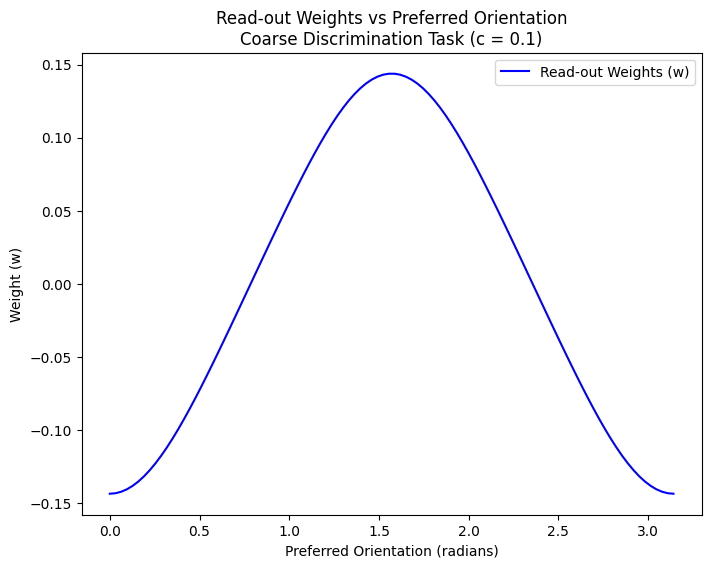

In [4]:
# Problem (b)

# Plot the read-out weights against preferred orientations
plt.figure(figsize=(8, 6))
plt.plot(phi_prefs, w_opt, label="Read-out Weights (w)", color="b")
plt.xlabel("Preferred Orientation (radians)")
plt.ylabel("Weight (w)")
plt.title("Read-out Weights vs Preferred Orientation\nCoarse Discrimination Task (c = 0.1)")
plt.legend()
plt.show()


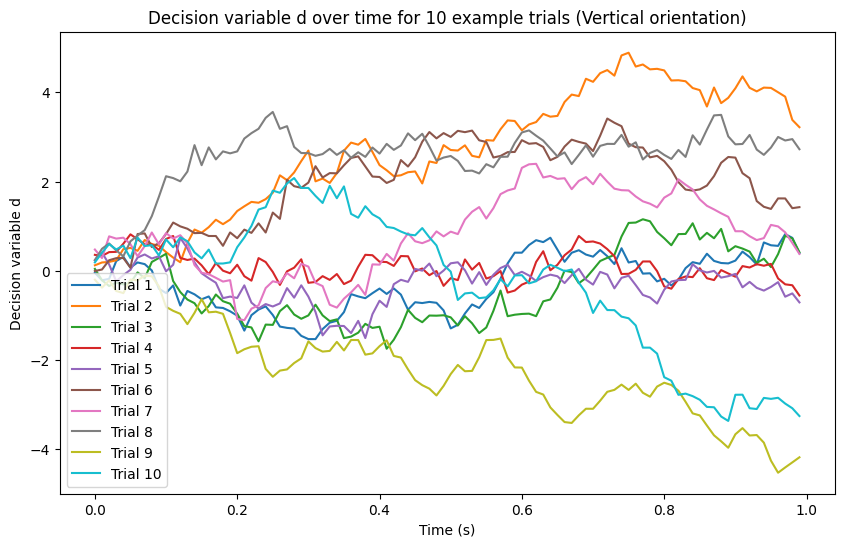

In [7]:
# Problem (c)
# Constants and parameters for the plot
N = 100          # Number of neurons
kappa = 1
f_max = 20       # Maximum firing rate (spikes/s)
f0 = 5           # Baseline firing rate (spikes/s)
B = np.inf       # Decision bound (no bound for this task)
phi_2 = np.pi/2  # Orientation phi_2 in radians (Vertical)
c = 0.0001       # Stimulus contrast for a very difficult task
time_bin = 0.01  # Time bin size in seconds (10 ms)
T_max = 1.0      # Maximum time in seconds
n_trials = 10    # Number of example trials

# Preferred orientations of neurons, uniformly distributed between 0 and pi
phi_prefs = np.linspace(0, np.pi, N)

def get_population_response(c, phi, phi_prefs, kappa, f_max, f0):
    f = f0 + c * f_max * np.exp(kappa * (np.cos(2 * (phi - phi_prefs)) - 1))
    r = np.random.poisson(f * time_bin)
    return r, f

def compute_weight_vector(f_phi1, f_phi2):
    f_phi_avg = (f_phi1 + f_phi2) / 2
    w_opt = (f_phi2 - f_phi1) / f_phi_avg
    w_opt = w_opt / np.linalg.norm(w_opt)
    return w_opt

# Precompute mean firing rates for phi_1 and phi_2
_, f_phi1 = get_population_response(c, 0, phi_prefs, kappa, f_max, f0)  # Horizontal
_, f_phi2 = get_population_response(c, phi_2, phi_prefs, kappa, f_max, f0)  # Vertical

# Compute the optimal weight vector
w_opt = compute_weight_vector(f_phi1, f_phi2)

# Simulate 10 example trials
plt.figure(figsize=(10, 6))
for trial in range(n_trials):
    d_values = []
    d = 0
    t_values = np.arange(0, T_max, time_bin)
    for t in t_values:
        rt, _ = get_population_response(c, phi_2, phi_prefs, kappa, f_max, f0)
        e_t = np.dot(w_opt, rt)
        d += e_t
        d_values.append(d)
    
    # Plot d as a function of time for this trial
    plt.plot(t_values, d_values, label=f'Trial {trial + 1}')

plt.xlabel('Time (s)')
plt.ylabel('Decision variable d')
plt.title('Decision variable d over time for 10 example trials (Vertical orientation)')
plt.legend()
plt.show()


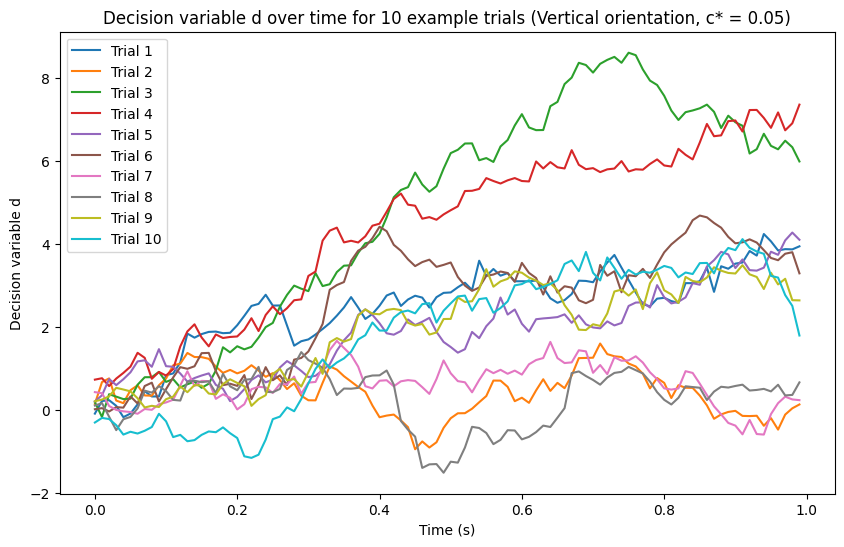

In [39]:
# Problem (c)
# Constants and parameters for the plot
N = 100          # Number of neurons
kappa = 1
f_max = 20       # Maximum firing rate (spikes/s)
f0 = 5           # Baseline firing rate (spikes/s)
B = np.inf       # Decision bound (no bound for this task)
phi_2 = np.pi/2  # Orientation phi_2 in radians (Vertical)
c = 0.05       # Stimulus contrast for a very difficult task
time_bin = 0.01  # Time bin size in seconds (10 ms)
T_max = 1.0      # Maximum time in seconds
n_trials = 10    # Number of example trials

# Preferred orientations of neurons, uniformly distributed between 0 and pi
phi_prefs = np.linspace(0, np.pi, N)

def get_population_response(c, phi, phi_prefs, kappa, f_max, f0):
    f = f0 + c * f_max * np.exp(kappa * (np.cos(2 * (phi - phi_prefs)) - 1))
    r = np.random.poisson(f * time_bin)
    return r, f

def compute_weight_vector(f_phi1, f_phi2):
    f_phi_avg = (f_phi1 + f_phi2) / 2
    w_opt = (f_phi2 - f_phi1) / f_phi_avg
    w_opt = w_opt / np.linalg.norm(w_opt)
    return w_opt

# Precompute mean firing rates for phi_1 and phi_2
_, f_phi1 = get_population_response(c, 0, phi_prefs, kappa, f_max, f0)  # Horizontal
_, f_phi2 = get_population_response(c, phi_2, phi_prefs, kappa, f_max, f0)  # Vertical

# Compute the optimal weight vector
w_opt = compute_weight_vector(f_phi1, f_phi2)

# Simulate 10 example trials
plt.figure(figsize=(10, 6))
for trial in range(n_trials):
    d_values = []
    d = 0
    t_values = np.arange(0, T_max, time_bin)
    for t in t_values:
        rt, _ = get_population_response(c, phi_2, phi_prefs, kappa, f_max, f0)
        e_t = np.dot(w_opt, rt)
        d += e_t
        d_values.append(d)
    
    # Plot d as a function of time for this trial
    plt.plot(t_values, d_values, label=f'Trial {trial + 1}')

plt.xlabel('Time (s)')
plt.ylabel('Decision variable d')
plt.title('Decision variable d over time for 10 example trials (Vertical orientation, c* = 0.05)')
plt.legend()
plt.show()

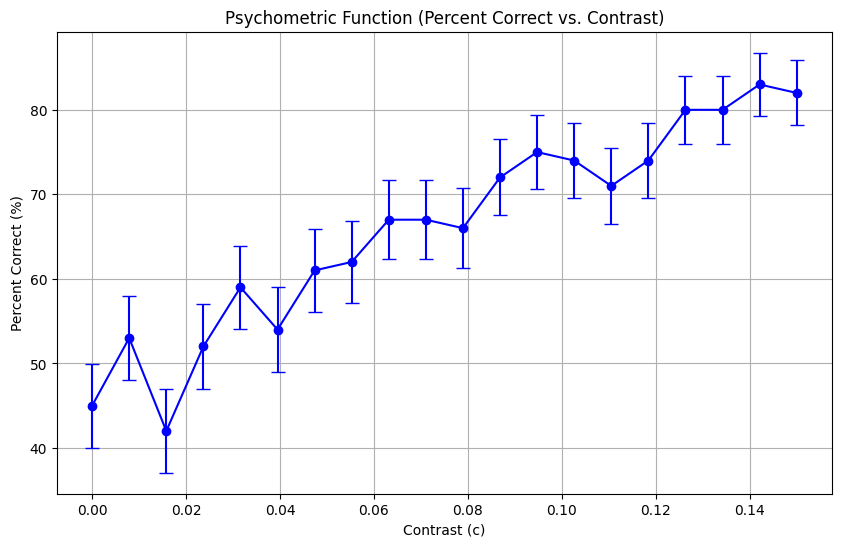

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100          # Number of neurons
kappa = 1
f_max = 20       # Maximum firing rate (spikes/s)
f0 = 5           # Baseline firing rate (spikes/s)
B = 0.5          # Decision bound
phi_2 = np.pi/2  # Orientation phi_2 in radians (Vertical)
c_star = 0.05    # Base contrast level
time_bin = 0.01  # Time bin size in seconds (10 ms)
T_max = 1.0      # Maximum time in seconds
n_trials = 100   # Number of trials for each contrast level

# Contrast levels
contrast_values = np.linspace(0, 3 * c_star, 20)

# Preferred orientations of neurons, uniformly distributed between 0 and pi
phi_prefs = np.linspace(0, np.pi, N)

def get_population_response(c, phi, phi_prefs, kappa, f_max, f0):
    f = f0 + c * f_max * np.exp(kappa * (np.cos(2 * (phi - phi_prefs)) - 1))
    r = np.random.poisson(f * time_bin)
    return r, f

def compute_weight_vector(f_phi1, f_phi2):
    f_phi_avg = (f_phi1 + f_phi2) / 2
    w_opt = (f_phi2 - f_phi1) / f_phi_avg
    w_opt = w_opt / np.linalg.norm(w_opt)
    return w_opt

def compute_decision_variable(w_opt, phi_stim, c):
    d = 0  # Initialize decision variable
    t = 0  # Initialize time
    while abs(d) < B and t < T_max:
        rt, _ = get_population_response(c, phi_stim, phi_prefs, kappa, f_max, f0)
        e_t = np.dot(w_opt, rt)
        d += e_t
        t += time_bin
    return d

# Precompute mean firing rates for phi_1 (horizontal) and phi_2 (vertical) at the lowest contrast
_, f_phi1 = get_population_response(c_star, 0, phi_prefs, kappa, f_max, f0)  # Horizontal
_, f_phi2 = get_population_response(c_star, phi_2, phi_prefs, kappa, f_max, f0)  # Vertical
w_opt = compute_weight_vector(f_phi1, f_phi2)

# Run simulations for each contrast level (only for vertical stimulus)
percent_correct = []
error_bars = []

for c in contrast_values:
    correct_trials = 0
    for _ in range(n_trials):
        # Set the stimulus to vertical
        phi_stim = phi_2  # Vertical
        correct_response = True  # Since the stimulus is vertical, we expect a positive d

        # Compute decision variable for the trial
        d = compute_decision_variable(w_opt, phi_stim, c)
        
        # Check if decision was correct
        if d > 0:  # Positive d indicates correct detection of vertical stimulus
            correct_trials += 1

    # Calculate percent correct and error
    p_correct = correct_trials / n_trials
    percent_correct.append(p_correct * 100)
    error = np.sqrt(p_correct * (1 - p_correct) / n_trials) * 100
    error_bars.append(error)

# Plot the psychometric function with error bars and connecting lines
plt.figure(figsize=(10, 6))
plt.errorbar(contrast_values, percent_correct, yerr=error_bars, fmt='o', capsize=5, color='blue')
plt.plot(contrast_values, percent_correct, color='blue')  # Line connecting data points
plt.xlabel('Contrast (c)')
plt.ylabel('Percent Correct (%)')
plt.title('Psychometric Function (Percent Correct vs. Contrast)')
plt.grid(True)
plt.show()


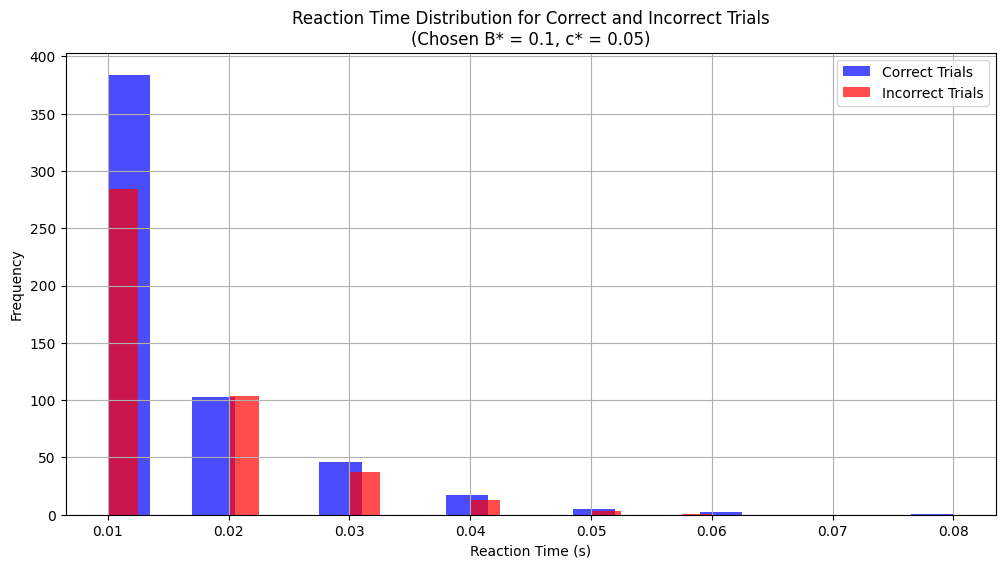

Chosen B* for ~75% decisions before T_max: 0.1


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100          # Number of neurons
kappa = 1
f_max = 20       # Maximum firing rate (spikes/s)
f0 = 5           # Baseline firing rate (spikes/s)
phi_2 = np.pi/2  # Orientation phi_2 in radians (Vertical)
c_star = 0.05    # Base contrast level
time_bin = 0.01  # Time bin size in seconds (10 ms)
T_max = 1.0      # Maximum time in seconds
n_trials = 1000  # Number of trials for determining B*

# Preferred orientations of neurons, uniformly distributed between 0 and pi
phi_prefs = np.linspace(0, np.pi, N)

def get_population_response(c, phi, phi_prefs, kappa, f_max, f0):
    f = f0 + c * f_max * np.exp(kappa * (np.cos(2 * (phi - phi_prefs)) - 1))
    r = np.random.poisson(f * time_bin)
    return r, f

def compute_weight_vector(f_phi1, f_phi2):
    f_phi_avg = (f_phi1 + f_phi2) / 2
    w_opt = (f_phi2 - f_phi1) / f_phi_avg
    w_opt = w_opt / np.linalg.norm(w_opt)
    return w_opt

def compute_decision_variable(w_opt, phi_stim, c, B):
    d = 0  # Initialize decision variable
    t = 0  # Initialize time
    while abs(d) < B and t < T_max:
        rt, _ = get_population_response(c, phi_stim, phi_prefs, kappa, f_max, f0)
        e_t = np.dot(w_opt, rt)
        d += e_t
        t += time_bin
    return d, t

# Precompute mean firing rates for phi_1 (horizontal) and phi_2 (vertical) at the lowest contrast
_, f_phi1 = get_population_response(c_star, 0, phi_prefs, kappa, f_max, f0)  # Horizontal
_, f_phi2 = get_population_response(c_star, phi_2, phi_prefs, kappa, f_max, f0)  # Vertical
w_opt = compute_weight_vector(f_phi1, f_phi2)

# Iteratively adjust B* to find a value that results in ~75% decisions before T_max
B_values = np.linspace(0.1, 1.0, 20)  # Range of B* values to test
chosen_B = None
for B in B_values:
    early_decisions = 0
    for _ in range(n_trials):
        _, t = compute_decision_variable(w_opt, phi_2, c_star, B)
        if t < T_max:
            early_decisions += 1
    if early_decisions / n_trials >= 0.75:
        chosen_B = B
        break

# If a suitable B* was found, simulate trials and separate correct and incorrect
if chosen_B is not None:
    reaction_times_correct = []
    reaction_times_incorrect = []
    for _ in range(n_trials):
        d, t = compute_decision_variable(w_opt, phi_2, c_star, chosen_B)
        if t < T_max:
            if d > 0:  # Correct response for vertical stimulus
                reaction_times_correct.append(t)
            else:  # Incorrect response
                reaction_times_incorrect.append(t)

    # Plot the histograms
    plt.figure(figsize=(12, 6))

    plt.hist(reaction_times_correct, bins=20, alpha=0.7, label='Correct Trials', color='blue')
    plt.hist(reaction_times_incorrect, bins=20, alpha=0.7, label='Incorrect Trials', color='red')
    plt.xlabel('Reaction Time (s)')
    plt.ylabel('Frequency')
    plt.title(f'Reaction Time Distribution for Correct and Incorrect Trials\n(Chosen B* = {chosen_B}, c* = {c_star})')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Chosen B* for ~75% decisions before T_max: {chosen_B}")
else:
    print("No suitable B* found that results in ~75% of trials being decided before T_max.")


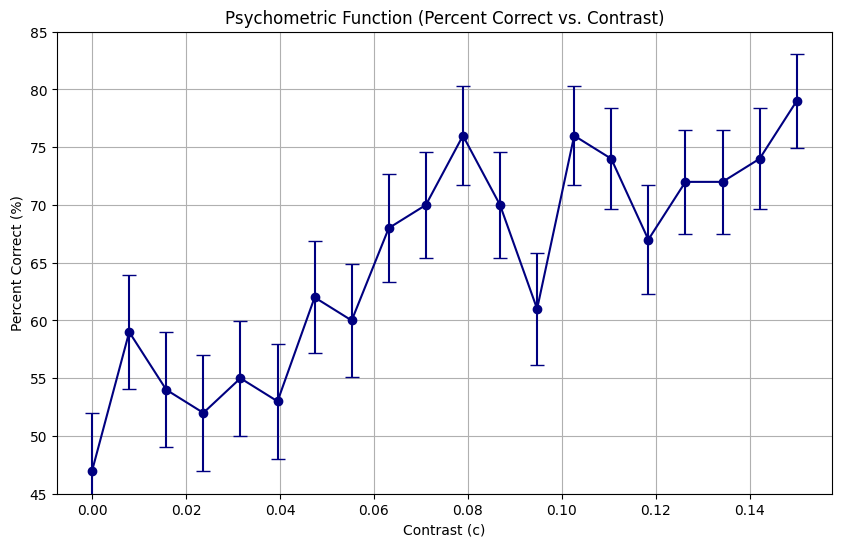

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100          # Number of neurons
kappa = 1
f_max = 20       # Maximum firing rate (spikes/s)
f0 = 5           # Baseline firing rate (spikes/s)
phi_2 = np.pi/2  # Orientation phi_2 in radians (Vertical)
c_star = 0.05    # Base contrast level
time_bin = 0.01  # Time bin size in seconds (10 ms)
T_max = 1.0      # Maximum time in seconds
n_trials = 100   # Number of trials per contrast level

# Contrast levels
contrast_values = np.linspace(0, 3 * c_star, 20)

# Preferred orientations of neurons, uniformly distributed between 0 and pi
phi_prefs = np.linspace(0, np.pi, N)

# Assume chosen_B was obtained in part (f)
chosen_B = 0.3  # Replace with actual B* found in part (f)

def get_population_response(c, phi, phi_prefs, kappa, f_max, f0):
    f = f0 + c * f_max * np.exp(kappa * (np.cos(2 * (phi - phi_prefs)) - 1))
    r = np.random.poisson(f * time_bin)
    return r, f

def compute_weight_vector(f_phi1, f_phi2):
    f_phi_avg = (f_phi1 + f_phi2) / 2
    w_opt = (f_phi2 - f_phi1) / f_phi_avg
    w_opt = w_opt / np.linalg.norm(w_opt)
    return w_opt

def compute_decision_variable(w_opt, phi_stim, c, B):
    d = 0  # Initialize decision variable
    t = 0  # Initialize time
    while abs(d) < B and t < T_max:
        rt, _ = get_population_response(c, phi_stim, phi_prefs, kappa, f_max, f0)
        e_t = np.dot(w_opt, rt)
        d += e_t
        t += time_bin
    return d, t

# Precompute mean firing rates for phi_1 (horizontal) and phi_2 (vertical) at the lowest contrast
_, f_phi1 = get_population_response(c_star, 0, phi_prefs, kappa, f_max, f0)  # Horizontal
_, f_phi2 = get_population_response(c_star, phi_2, phi_prefs, kappa, f_max, f0)  # Vertical
w_opt = compute_weight_vector(f_phi1, f_phi2)

# Run simulations for each contrast level (only for vertical stimulus)
percent_correct = []
error_bars = []

for c in contrast_values:
    correct_trials = 0
    for _ in range(n_trials):
        # Set the stimulus to vertical
        phi_stim = phi_2  # Vertical
        correct_response = True  # Since the stimulus is vertical, we expect a positive d

        # Compute decision variable for the trial with chosen B*
        d, _ = compute_decision_variable(w_opt, phi_stim, c, chosen_B)
        
        # Check if decision was correct
        if d > 0:  # Positive d indicates correct detection of vertical stimulus
            correct_trials += 1

    # Calculate percent correct and error
    p_correct = correct_trials / n_trials
    percent_correct.append(p_correct * 100)
    error = np.sqrt(p_correct * (1 - p_correct) / n_trials) * 100
    error_bars.append(error)

# Plot the psychometric function with error bars and connecting lines
plt.figure(figsize=(10, 6))
plt.errorbar(contrast_values, percent_correct, yerr=error_bars, fmt='o', capsize=5, color='navy')
plt.plot(contrast_values, percent_correct, color='navy')  # Line connecting data points
plt.xlabel('Contrast (c)')
plt.ylabel('Percent Correct (%)')
plt.title('Psychometric Function (Percent Correct vs. Contrast)')
plt.ylim(45, 85)  # Adjust y-axis limits if needed to match your example
plt.grid(True)
plt.show()


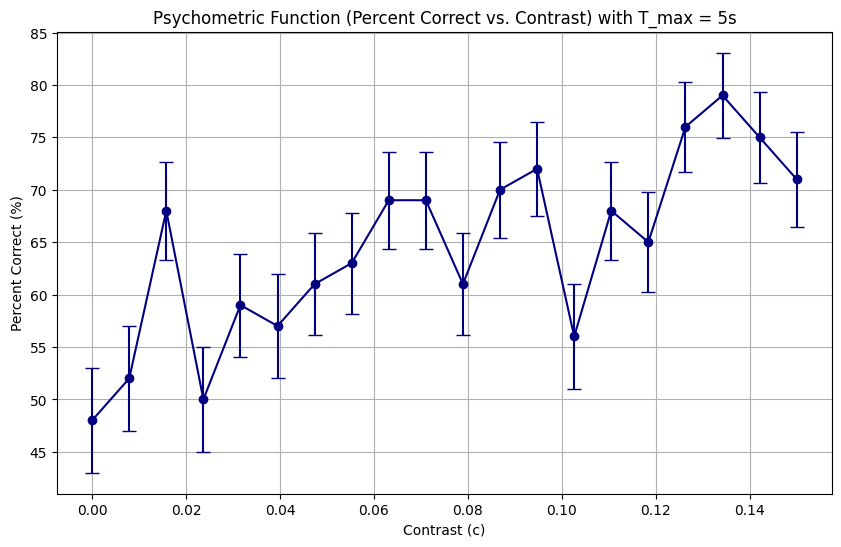

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100          # Number of neurons
kappa = 1
f_max = 20       # Maximum firing rate (spikes/s)
f0 = 5           # Baseline firing rate (spikes/s)
phi_2 = np.pi/2  # Orientation phi_2 in radians (Vertical)
c_star = 0.05    # Base contrast level
time_bin = 0.01  # Time bin size in seconds (10 ms)
T_max = 5.0      # Maximum time in seconds (changed to 5 seconds)
n_trials = 100   # Number of trials for each contrast level

# Contrast levels
contrast_values = np.linspace(0, 3 * c_star, 20)

# Preferred orientations of neurons, uniformly distributed between 0 and pi
phi_prefs = np.linspace(0, np.pi, N)

# Assume chosen_B was obtained in part (f)
chosen_B = 0.3  # Replace with the actual B* value found in part (f)

def get_population_response(c, phi, phi_prefs, kappa, f_max, f0):
    f = f0 + c * f_max * np.exp(kappa * (np.cos(2 * (phi - phi_prefs)) - 1))
    r = np.random.poisson(f * time_bin)
    return r, f

def compute_weight_vector(f_phi1, f_phi2):
    f_phi_avg = (f_phi1 + f_phi2) / 2
    w_opt = (f_phi2 - f_phi1) / f_phi_avg
    w_opt = w_opt / np.linalg.norm(w_opt)
    return w_opt

def compute_decision_variable(w_opt, phi_stim, c, B):
    d = 0  # Initialize decision variable
    t = 0  # Initialize time
    while abs(d) < B and t < T_max:
        rt, _ = get_population_response(c, phi_stim, phi_prefs, kappa, f_max, f0)
        e_t = np.dot(w_opt, rt)
        d += e_t
        t += time_bin
    return d

# Precompute mean firing rates for phi_1 (horizontal) and phi_2 (vertical) at the lowest contrast
_, f_phi1 = get_population_response(c_star, 0, phi_prefs, kappa, f_max, f0)  # Horizontal
_, f_phi2 = get_population_response(c_star, phi_2, phi_prefs, kappa, f_max, f0)  # Vertical
w_opt = compute_weight_vector(f_phi1, f_phi2)

# Run simulations for each contrast level (only for vertical stimulus)
percent_correct = []
error_bars = []

for c in contrast_values:
    correct_trials = 0
    for _ in range(n_trials):
        # Set the stimulus to vertical
        phi_stim = phi_2  # Vertical
        correct_response = True  # Since the stimulus is vertical, we expect a positive d

        # Compute decision variable for the trial with chosen B*
        d = compute_decision_variable(w_opt, phi_stim, c, chosen_B)
        
        # Check if decision was correct
        if d > 0:  # Positive d indicates correct detection of vertical stimulus
            correct_trials += 1

    # Calculate percent correct and error
    p_correct = correct_trials / n_trials
    percent_correct.append(p_correct * 100)
    error = np.sqrt(p_correct * (1 - p_correct) / n_trials) * 100
    error_bars.append(error)

# Plot the psychometric function with error bars and connecting lines
plt.figure(figsize=(10, 6))
plt.errorbar(contrast_values, percent_correct, yerr=error_bars, fmt='o', capsize=5, color='navy')
plt.plot(contrast_values, percent_correct, color='navy')  # Line connecting data points
plt.xlabel('Contrast (c)')
plt.ylabel('Percent Correct (%)')
plt.title('Psychometric Function (Percent Correct vs. Contrast) with T_max = 5s')
plt.grid(True)
plt.show()


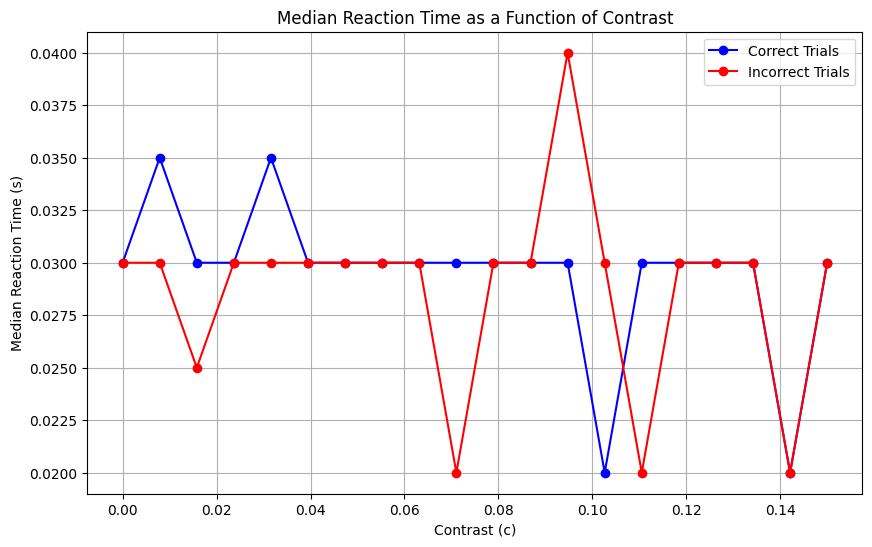

In [26]:
# Run simulations for each contrast level (only for vertical stimulus)
median_reaction_times_correct = []
median_reaction_times_incorrect = []

for c in contrast_values:
    reaction_times_correct = []
    reaction_times_incorrect = []

    for _ in range(n_trials):
        # Set the stimulus to vertical only
        phi_stim = phi_2  # Vertical

        # Compute decision variable for the trial with chosen B*
        d, reaction_time = compute_decision_variable(w_opt, phi_stim, c, chosen_B)
        
        # Separate reaction times into correct and incorrect trials
        if d > 0:  # Correct trial for vertical stimulus
            reaction_times_correct.append(reaction_time)
        else:  # Incorrect trial
            reaction_times_incorrect.append(reaction_time)

    # Calculate median reaction times for correct and incorrect trials
    if reaction_times_correct:
        median_reaction_times_correct.append(np.median(reaction_times_correct))
    else:
        median_reaction_times_correct.append(np.nan)  # If no correct trials, append NaN
    
    if reaction_times_incorrect:
        median_reaction_times_incorrect.append(np.median(reaction_times_incorrect))
    else:
        median_reaction_times_incorrect.append(np.nan)  # If no incorrect trials, append NaN

# Plot median reaction times for correct and incorrect trials
plt.figure(figsize=(10, 6))
plt.plot(contrast_values, median_reaction_times_correct, label='Correct Trials', color='blue', marker='o', linestyle='-')
plt.plot(contrast_values, median_reaction_times_incorrect, label='Incorrect Trials', color='red', marker='o', linestyle='-')
plt.xlabel('Contrast (c)')
plt.ylabel('Median Reaction Time (s)')
plt.title('Median Reaction Time as a Function of Contrast')
plt.legend()
plt.grid(True)
plt.show()
